<a href="https://colab.research.google.com/github/ferdevpy/Challenge/blob/main/MeteorGarden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Aquisição de dados e bibliotecas

In [264]:
!pip install pillow
!pip install mahotas

In [265]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import mahotas
from PIL import Image
import imutils
import matplotlib.pyplot as plt


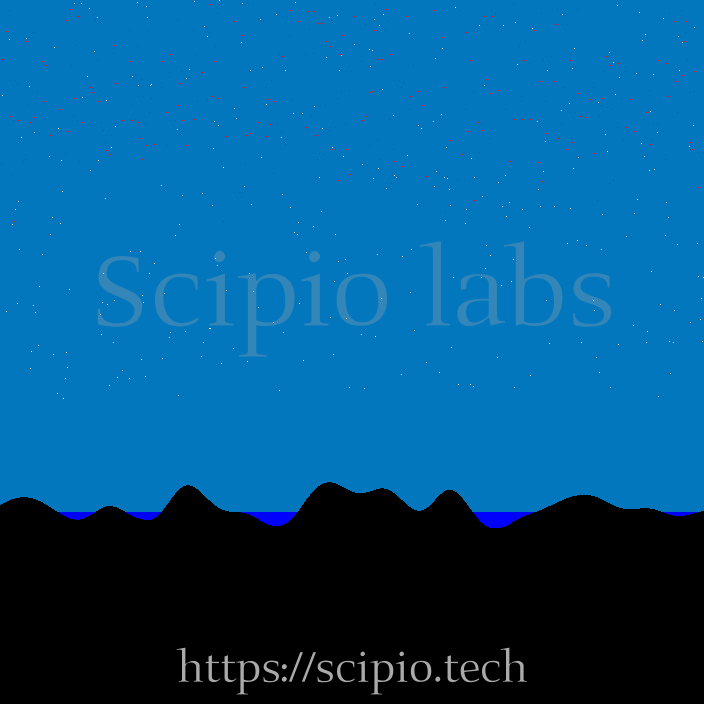

In [266]:
imagem=Image.open('meteor_challenge_01.png')
imagem

#2.Analisando imagem

In [274]:
#Informações sobre a imagem
print(f'Formato: {imagem.format}')
print(f'Canal do formato de pixels: {imagem.mode}')
print(f'Dimensões: {imagem.size}')

Formato: PNG
Canal do formato de pixels: RGBA
Dimensões: (704, 704)


In [275]:
#função que escreve sobre as imagens
def write(img,texto,cor=(255,0,0)):
  fonte=cv2.FONT_HERSHEY_SIMPLEX
  return cv2_imshow(cv2.putText(img,texto,(10,20),fonte,0.5,cor,0,cv2.LINE_AA))


In [276]:
#importando a imagem again
img=cv2.imread('meteor_challenge_01.png')

#Contando estrelas e meteoros

Como os objetos a serem encontrados possuem uma única cor, optei por criar uma máscara para cada cor. no código abaixo foi criada a máscara para a cor branca. Ao aplicá-la na imagem, somente os pontos brancos irão aparecer, eles são as estrelas.

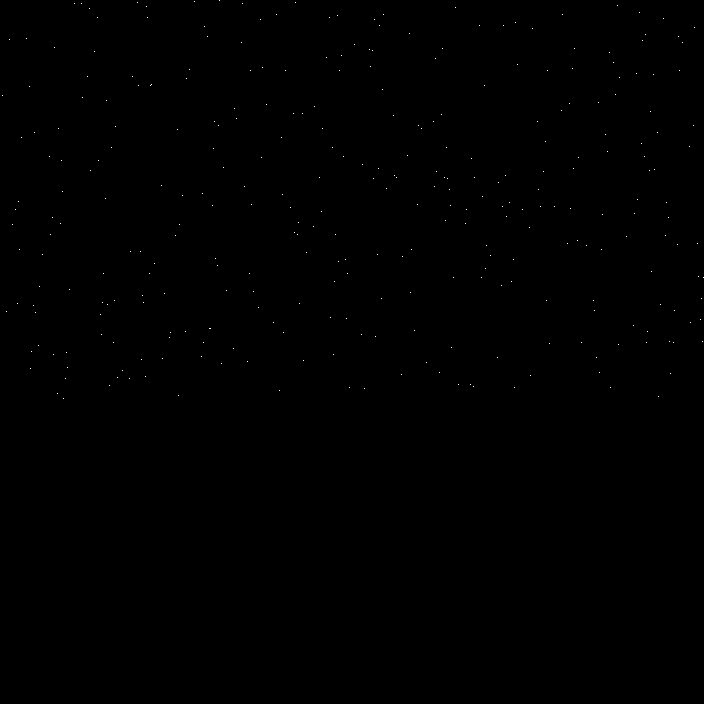

In [277]:
imagemtest=img
kernel = np.ones((5 ,5), np.uint8)
color = np.array([255, 255,255]) # B, G, R
estrelas = cv2.inRange(imagemtest,color,color)
cv2_imshow(estrelas)


O mesmo processo foi feito para encontrar os meteoros. A única diferença está no código da cor, branco=(255,255,255) e vermelho=(0,0,255)

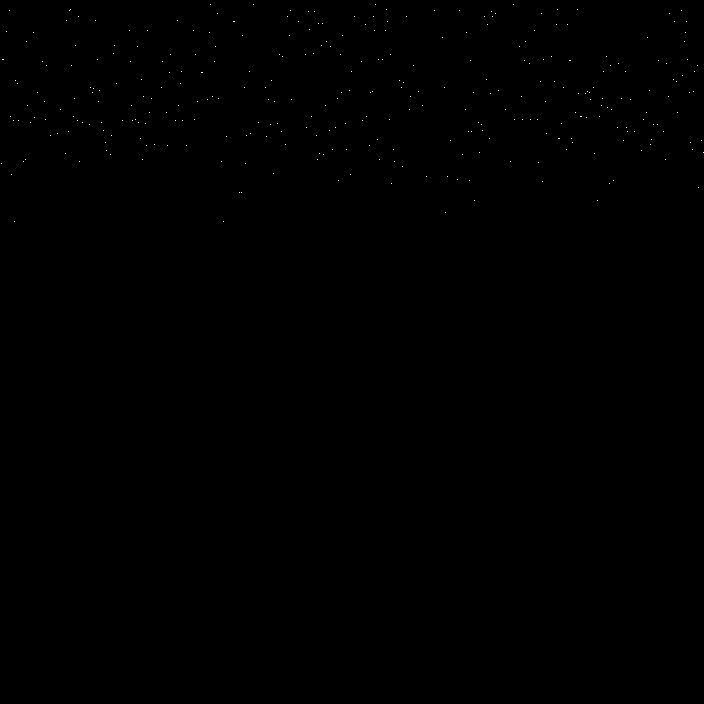

In [278]:

imagemtest=img
kernel = np.ones((5 ,5), np.uint8)
color2 = np.array([0,0,255,]) # B, G, R
meteoros= cv2.inRange(imagemtest,color2,color2)
cv2_imshow(meteoros)
part2=meteoros.copy()

O código abaixo faz o resto do trabalho. 
Como a imagem já está em preto e branco, não foi necessário aplicar outro filtro. 
A função display foi utilizada apenas para plotar as imagens lado a lado, mostrando os pontos selecionados. 
Em resumo, o código localiza os pontos usando a distancia entre eles inicialmente. Em seguida os contorna. 

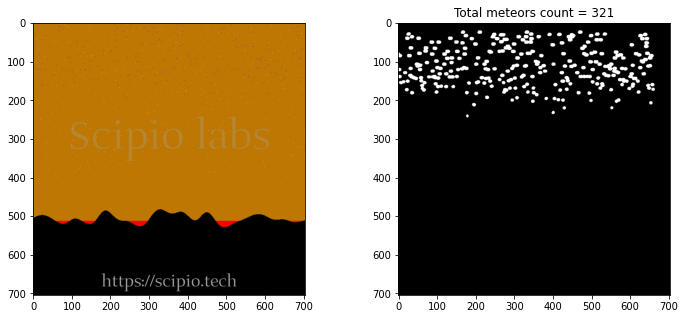

In [279]:
dist_transform = cv2.distanceTransform(meteoros.copy(),cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
def display(img,count,cmap="gray"):
    f_image = cv2.imread('meteor_challenge_01.png')
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total meteors count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(meteoros, "{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 5)
	cv2.drawContours(meteoros, [c], -1, (0, 255, 0), 2)

display(meteoros,len(cnts))

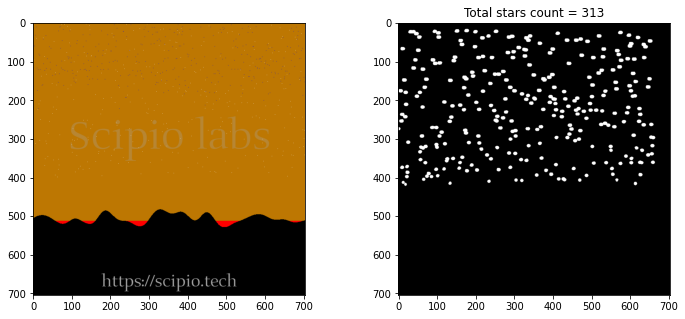

In [280]:
dist_transform = cv2.distanceTransform(estrelas.copy(),cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
def display(img,count,cmap="gray"):
    f_image = cv2.imread('meteor_challenge_01.png')
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total stars count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(estrelas, "{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 5)
	cv2.drawContours(estrelas, [c], -1, (0, 255, 0), 2)

display(estrelas,len(cnts))

#Mar e meteoros

Nessa parte, os mesmos métodos foram utilizados para filtrar a região de interesse. Como é a primeira vez que trabalho com análise de imagens,minha solução para a segunda foi a mais simples possível. Observei que o nível do mar era o mesmo, então a altura era a mesma, sendo assim o que variava era o 'x'.
Por esse motivo mapeei cada pixel, observando onde começava e onde terminava cada intervalo do mar. Com isso determinei o range de cada intervalo. posteriormente, usei os intervalos para selecionar as regiões de interesse. Por último, apliquei o mesmo método para contar a quantidade de meteoros em cada range, somando-os para obter o total.


Text(0.5, 1.0, 'Sea and Meteors')

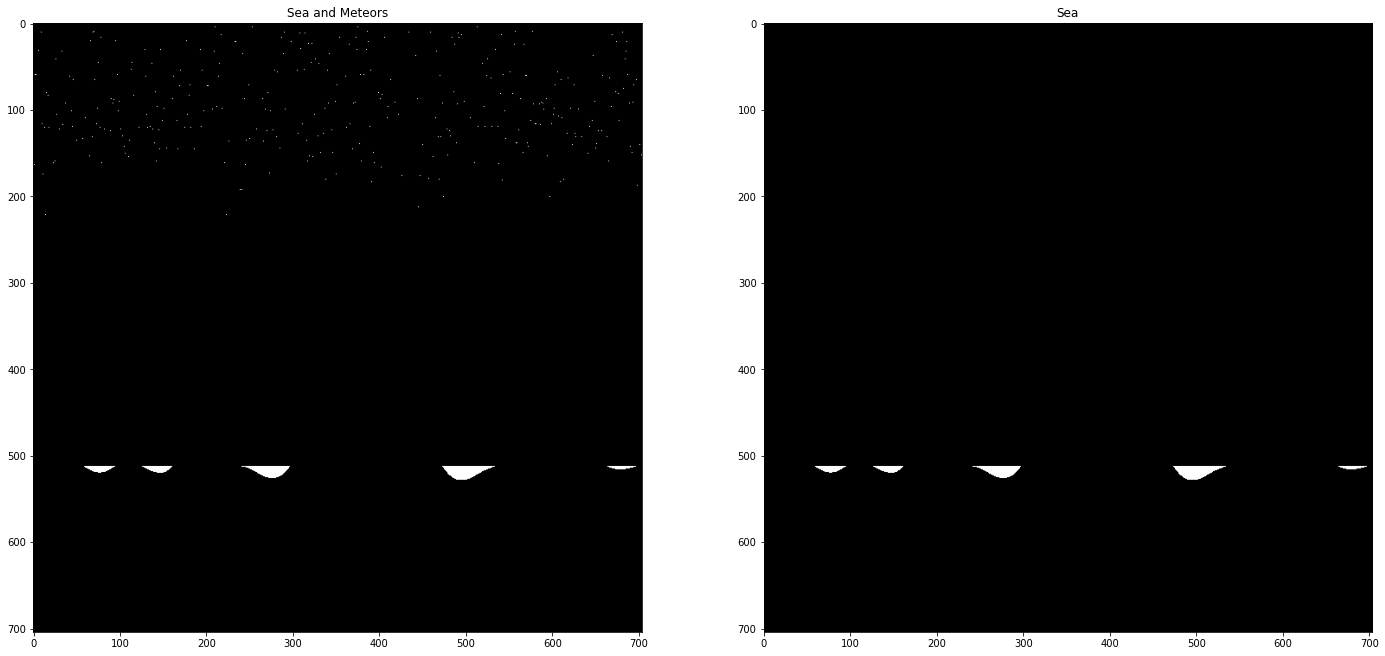

In [281]:
imagemtest=img
kernel = np.ones((5 ,5), np.uint8)
min=np.array([0,0,255])
color = np.array([255, 0,0]) # B, G, R
sea=cv2.inRange(imagemtest,color,color)
seaandmeteors= cv2.inRange(imagemtest,min,min)+cv2.inRange(imagemtest,color,color)
f, axs = plt.subplots(1,2,figsize=(24,24))
axs[0].imshow(seaandmeteors,cmap="gray")
axs[1].imshow(sea,cmap="gray")
axs[1].set_title("Sea")
axs[0].set_title("Sea and Meteors")

In [282]:
y=0
interx=[]
intery=[]
for row in sea:
  x=0
  cordx=[]
  cordy=[]
  for col in row:
    if col!=0:
      cordx.append(x)
      cordy.append(y)
    elif col==0 and len(cordx)>0:
      interx.append(cordx)
      intery.append(cordy)
    x=x+1
  y=y+1



In [283]:
superfmar=list(zip(interx[0],intery[0]))

In [284]:
start=[]
end=[]
i=0
for co in superfmar:
  if i==0:
    start.append((co[0],co[1]))
  elif co[0]!=(ant+1) or i==len(superfmar)-1:
    end.append((ant,co[1]))
    if co[0]!=(ant+1):
      start.append((co[0],co[1]))
  i=i+1

  ant=co[0]

In [285]:
inter1=part2[:,start[0][0]:end[0][0]]
inter2=part2[:,start[1][0]:end[1][0]]
inter3=part2[:,start[2][0]:end[2][0]]
inter4=part2[:,start[3][0]:end[3][0]]
inter5=part2[:,start[4][0]:end[4][0]]


In [286]:
dist_transform = cv2.distanceTransform(inter1.copy(),cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(inter1, "{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 5)
	cv2.drawContours(inter1, [c], -1, (0, 255, 0), 2)
print(f"Total de meteoros= {len(cnts)}")




Total de meteoros= 17


In [287]:
dist_transform = cv2.distanceTransform(inter2.copy(),cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(inter2, "{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 5)
	cv2.drawContours(inter2, [c], -1, (0, 255, 0), 2)
print(f"Total de meteoros= {len(cnts)}")

pin=len(cnts)

Total de meteoros= 17


In [288]:
dist_transform = cv2.distanceTransform(inter3.copy(),cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(inter3, "{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 5)
	cv2.drawContours(inter3, [c], -1, (0, 255, 0), 2)
print(f"Total de meteoros= {len(cnts)}")
sin=len(cnts)


Total de meteoros= 25


In [289]:
dist_transform = cv2.distanceTransform(inter4.copy(),cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(inter4, "{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 5)
	cv2.drawContours(inter4, [c], -1, (0, 255, 0), 2)
print(f"Total de meteoros= {len(cnts)}")
tin=len(cnts)


Total de meteoros= 26


In [290]:
dist_transform = cv2.distanceTransform(inter5.copy(),cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(inter5, "{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 5)
	cv2.drawContours(inter5, [c], -1, (0, 255, 0), 2)
print(f"Total de meteoros= {len(cnts)}")
qin=len(cnts)


Total de meteoros= 19


In [292]:
Qt=pin+sin+tin+qin+qqin
print(f'Quantidade de meteoros que vão cair na água: {Qt}')

Quantidade de meteoros que vão cair na água: 87
